**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


Initialize dataview success.


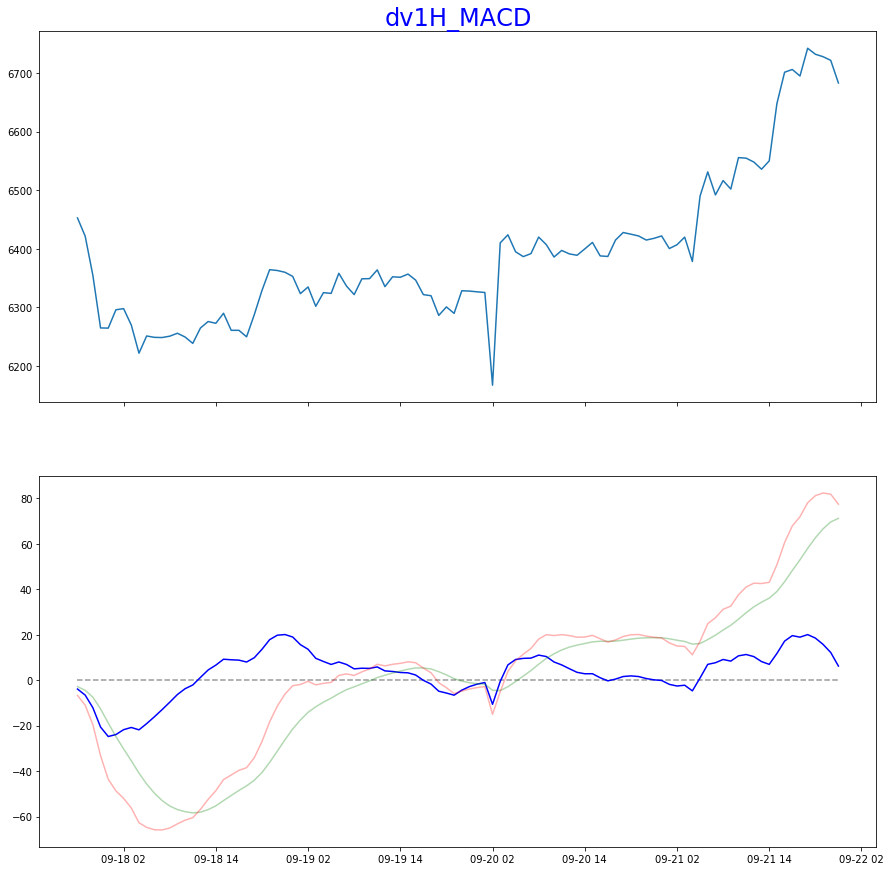

In [4]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

dv1H.add_formula('MACD',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True)
dv1H.add_formula('MACD_Signal',"Ta('EMA',0,0,0,0,MACD,0,9)",add_data=True)
dv1H.add_formula('MACD_Hist',"(MACD-MACD_Signal)",add_data=True)

import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, MACD_Hist, MACD_Signal,MACD,chart_name='dv1H_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD_Hist.iloc[n:],color='blue',alpha=1)
    ax1.plot(MACD_Signal.iloc[n:],color='green',alpha=0.3)
    ax1.plot(MACD.iloc[n:],color='red',alpha=0.3)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], alpha=0.4, linestyle='--')

    plt.show()
   
MACD=dv1H.get_ts('MACD', date_type='datetime') 
MACD_Signal=dv1H.get_ts('MACD_Signal', date_type='datetime') 
MACD_Hist=dv1H.get_ts('MACD_Hist', date_type='datetime') 

Plot_Mean(dv1H, MACD_Hist.iloc[:,0], MACD_Signal.iloc[:,0], MACD.iloc[:,0], n=-100)

Initialize dataview success.


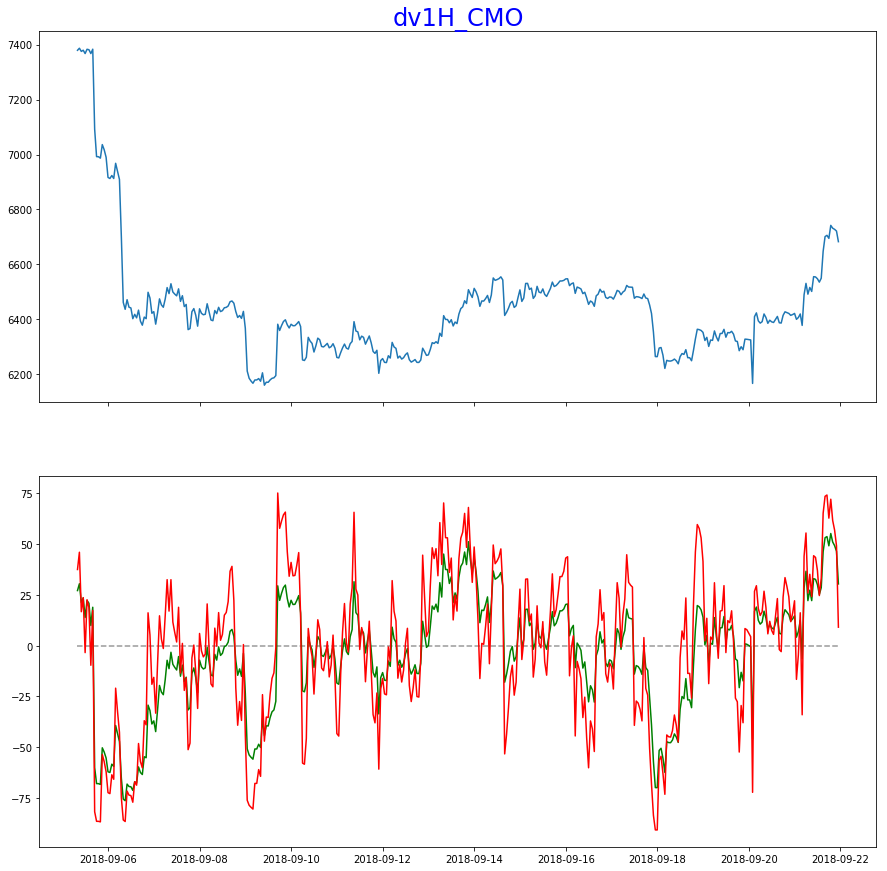

In [18]:
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high_adj,low_adj,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))
dv1H.add_formula('CMO_long', "Ta('CMO',0,0,0,0,close,0,14)", add_data = True)
dv1H.add_formula('CMO_short', "Ta('CMO',0,0,0,0,close,0,6)", add_data = True)


import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
def Plot(dv, indicator1, indicator2, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(indicator1.iloc[-n:], color = 'green')
    ax1.plot(indicator2.iloc[-n:],color = 'red')
    ax1.hlines(0, indicator1.iloc[n:].index[-n], indicator1.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    plt.show()

CMO_long = dv1H.get_ts('CMO_long', date_type='datetime')
CMO_short = dv1H.get_ts('CMO_short', date_type='datetime')

Plot(dv1H, CMO_long, CMO_short, chart_name='dv1H_CMO', n=400)

In [ ]:
MACD因子：
现象：类似于导数，大于0时价格上涨，小于0时价格下跌
CMO因子：
现象：CMO线与收盘价变动的方向一致，即基本满足收盘价上升时CMO线上升，收盘价下降时CMO线下降

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

In [ ]:
MACD因子：
进出场信号：由小于0变为大于0进场，由大于0变为小于0出场
CMO因子：
进出场信号：由下降转为上升时入场，由上升转为下降时出场